In [1]:
! pip install \
   pandas matplotlib numpy \
   nltk seaborn wordcloud 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
plt.rcParams["figure.figsize"] = (10,8)

In [3]:
df = pd.read_csv("../input/mini-clean-goodreads-train/mini_clean_train_goodreads.csv")

In [4]:
df.sample(5)

,review_id,review_text_tokens,rating
8166,306fbba5102c4e8b3515269e17f3a01d,hunger game recieving hype newberry prinz amaz...,5
5466,3fd4421f4c1d43c96bb4f27d8d94cc45,hype book received expecting much especially s...,2
1812,3b2b48e958a06c7e8608fbdf80877b11,storied life j fikry tell story bookstore owne...,3
7553,db584ecf7aa62b84c9ac5e153b725260,wish tracked many time read series far course ...,5
8266,24aeb10545c98b4f08659d530b7095af,started bit slow end really loved also stiefva...,4


In [5]:
df.rename(columns={'review_text_tokens':'text'}, inplace=True)
df.set_index('review_id', inplace=True)
df.head()

,text,rating
review_id,,
a8acb9e31135f51532a75fff5c085111,star rating subject change need think one mome...,3
c2f8a716b8aec9f396615d4818197631,hidden huntress book two malediction trilogy s...,4
8abc2af0f72a7e8c88b02d85d84dacc8,uhmm review come,2
1ced5d4984cdeef8e352c7df0a290d33,good read book one sitting cried another beaut...,4
b01641e425f199e99e69b05d0866728c,four head like made giddy inside,3


In [6]:
df['splitted'] = df['text'].str.split()
df.head()

,text,rating,splitted
review_id,,,
a8acb9e31135f51532a75fff5c085111,star rating subject change need think one mome...,3,"[star, rating, subject, change, need, think, o..."
c2f8a716b8aec9f396615d4818197631,hidden huntress book two malediction trilogy s...,4,"[hidden, huntress, book, two, malediction, tri..."
8abc2af0f72a7e8c88b02d85d84dacc8,uhmm review come,2,"[uhmm, review, come]"
1ced5d4984cdeef8e352c7df0a290d33,good read book one sitting cried another beaut...,4,"[good, read, book, one, sitting, cried, anothe..."
b01641e425f199e99e69b05d0866728c,four head like made giddy inside,3,"[four, head, like, made, giddy, inside]"


# Analyzing text statistics


Text(0.5, 0, 'Text length')

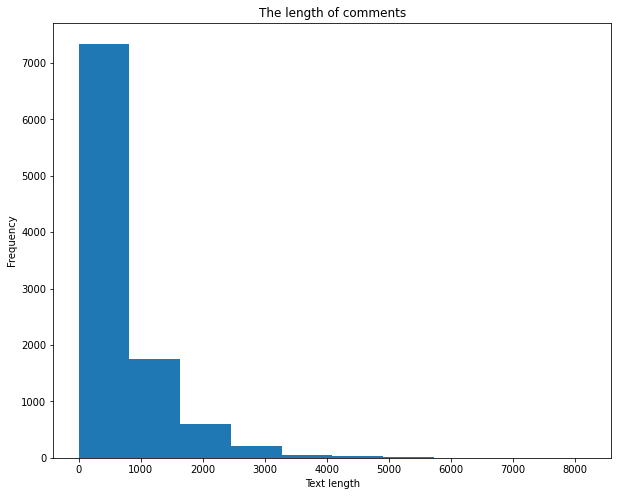

In [7]:
df['text'].str.len().\
                plot(kind='hist', title="The length of comments").set_xlabel("Text length")

Text(0.5, 0, 'Number of words')

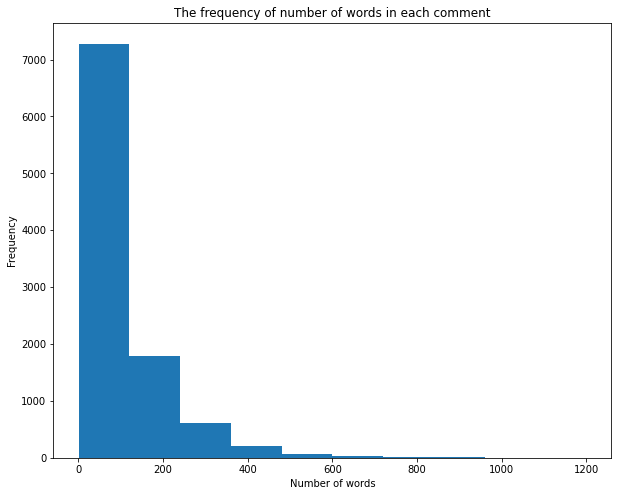

In [8]:
df['splitted'].str.len().\
                    plot(kind='hist', title='The frequency of number of words in each comment').set_xlabel('Number of words')

Text(0.5, 0, 'The mean of words length')

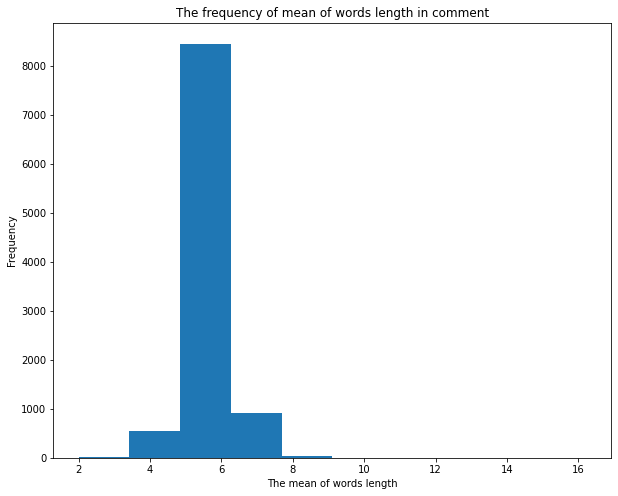

In [9]:
df['text'].str.split().\
                apply(lambda txt: [len(word) for word in txt]).\
                map(lambda words_len: np.mean(words_len)).\
                plot(kind='hist', title='The frequency of mean of words length in comment').set_xlabel('The mean of words length')

In [10]:
word_count = pd.DataFrame.from_dict(dict(Counter(" ".join(df['text']).split())), 
                                            orient='index', columns=['count']).\
                                            sort_values(by='count', ascending=False)
word_count.head()

,count
book,23008
read,8925
like,8888
one,8886
story,8728


Text(0.5, 1.0, 'The number of most common words')

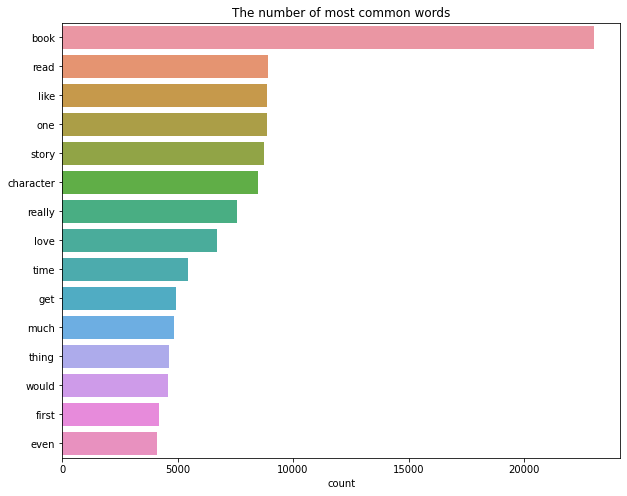

In [11]:
sns.barplot(x=word_count[:15]['count'], y=word_count[:15].index).set_title('The number of most common words')

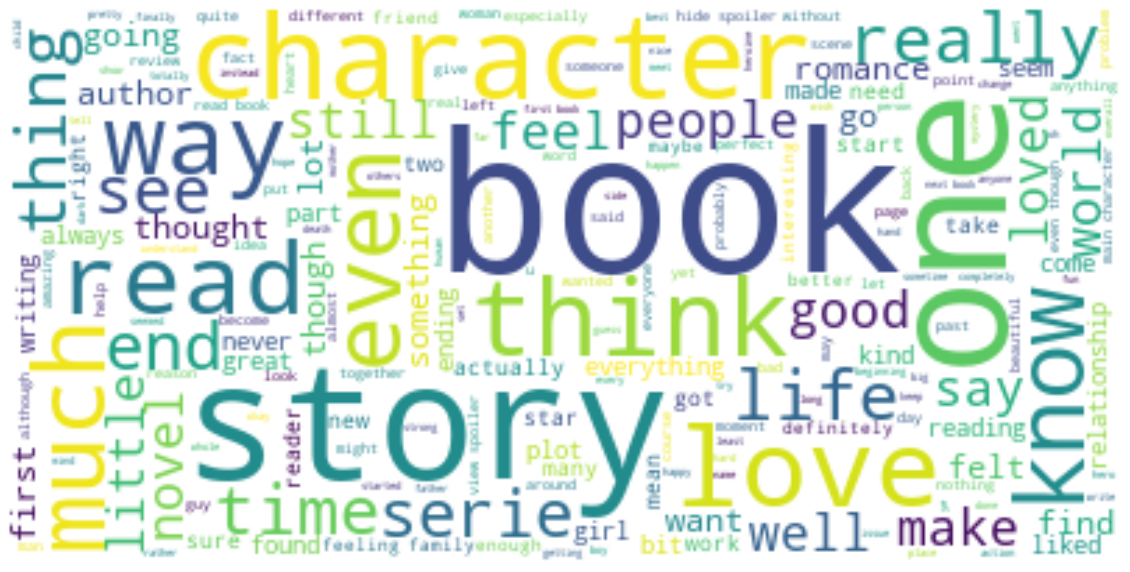

In [12]:
wordcloud = WordCloud(background_color="white").generate(" ".join(i for i in df.text))
plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()